# Classificação de Clientes:

Irei classificar os clientes de acordo com RFM (recency, frequency and monetary) para que a empresa consiga encontrar 'bons' clientes de forma mais eficiente.

# Carregando Dataset:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel("../data/online_retail_cleaned.xlsx")

In [4]:
df.head()

,invoice_no,stock_code_cleaned,description_cleaned,quantity_cleaned,invoice_date,unit_price_cleaned,customer_id,country_cleaned
0,536620,21058,party invites woodland,12,2010-12-02 10:27:00,0.85,14135,united kingdom
1,536620,21060,party invites balloon girl,12,2010-12-02 10:27:00,0.85,14135,united kingdom
2,536620,21061,party invites football,12,2010-12-02 10:27:00,0.85,14135,united kingdom
3,536620,21062,party invites spaceman,12,2010-12-02 10:27:00,0.85,14135,united kingdom
4,536620,21719,lovely bonbon sticker sheet,12,2010-12-02 10:27:00,0.85,14135,united kingdom


In [5]:
df.describe()

,invoice_no,stock_code_cleaned,quantity_cleaned,invoice_date,unit_price_cleaned,customer_id
count,396337.000000,396337.000000,396337.000000,396337,396337.000000,396337.000000
mean,560618.894506,30763.483813,13.012547,2011-07-11 00:04:38.980463872,2.868222,15301.689416
min,536365.000000,10002.000000,1.000000,2010-12-01 08:26:00,0.040000,12346.000000
25%,549235.000000,22027.000000,2.000000,2011-04-07 11:16:00,1.250000,13975.000000
50%,561893.000000,22666.000000,6.000000,2011-07-31 14:39:00,1.950000,15159.000000
75%,572092.000000,23271.000000,12.000000,2011-10-20 14:41:00,3.750000,16803.000000
max,581587.000000,90214.000000,80995.000000,2011-12-09 12:50:00,649.500000,18287.000000
std,13106.373686,20606.664522,179.641245,NaN,4.264663,1709.961948


# Preparando os dados:

Irei separar os três dados necessários:

- Recência ***('recency')***: Dias desde a última compra.
- Frequência ***('frequency')***: Número de transações feitas pelo cliente.
- Receita ***('monetary')***: Gasto total do cliente.

### Recência (recency_df):

In [6]:
# Converter para datatype apropriado
df["invoice_date"] = pd.to_datetime(df["invoice_date"])

In [7]:
# Encontrando última transação
max_date = max(df["invoice_date"])
max_date

Timestamp('2011-12-09 12:50:00')

In [11]:
# Definindo dias desde a última transação (recency)
df["recency"] = (max_date - df["invoice_date"]).dt.days
df.head()

,invoice_no,stock_code_cleaned,description_cleaned,quantity_cleaned,invoice_date,unit_price_cleaned,customer_id,country_cleaned,recency
0,536620,21058,party invites woodland,12,2010-12-02 10:27:00,0.85,14135,united kingdom,372
1,536620,21060,party invites balloon girl,12,2010-12-02 10:27:00,0.85,14135,united kingdom,372
2,536620,21061,party invites football,12,2010-12-02 10:27:00,0.85,14135,united kingdom,372
3,536620,21062,party invites spaceman,12,2010-12-02 10:27:00,0.85,14135,united kingdom,372
4,536620,21719,lovely bonbon sticker sheet,12,2010-12-02 10:27:00,0.85,14135,united kingdom,372


In [12]:
# Criando receita (monetary)
df["monetary"] = df["unit_price_cleaned"] * df["quantity_cleaned"]
df.head()

,invoice_no,stock_code_cleaned,description_cleaned,quantity_cleaned,invoice_date,unit_price_cleaned,customer_id,country_cleaned,recency,monetary
0,536620,21058,party invites woodland,12,2010-12-02 10:27:00,0.85,14135,united kingdom,372,10.2
1,536620,21060,party invites balloon girl,12,2010-12-02 10:27:00,0.85,14135,united kingdom,372,10.2
2,536620,21061,party invites football,12,2010-12-02 10:27:00,0.85,14135,united kingdom,372,10.2
3,536620,21062,party invites spaceman,12,2010-12-02 10:27:00,0.85,14135,united kingdom,372,10.2
4,536620,21719,lovely bonbon sticker sheet,12,2010-12-02 10:27:00,0.85,14135,united kingdom,372,10.2


In [14]:
RFM = (
    df.groupby("customer_id", as_index=False) # agrupa por cliente...
    .agg(
        recency=("recency","min"), # última transação
        frequency=("invoice_no", "count"), # número total de transações
        monetary=("monetary","sum") # valor total gasto
    )
)

RFM.head()

,customer_id,recency,frequency,monetary
0,12346,325,1,77183.60
1,12347,1,182,4310.00
2,12348,74,27,1437.24
3,12349,18,72,1457.55
4,12350,309,16,294.40


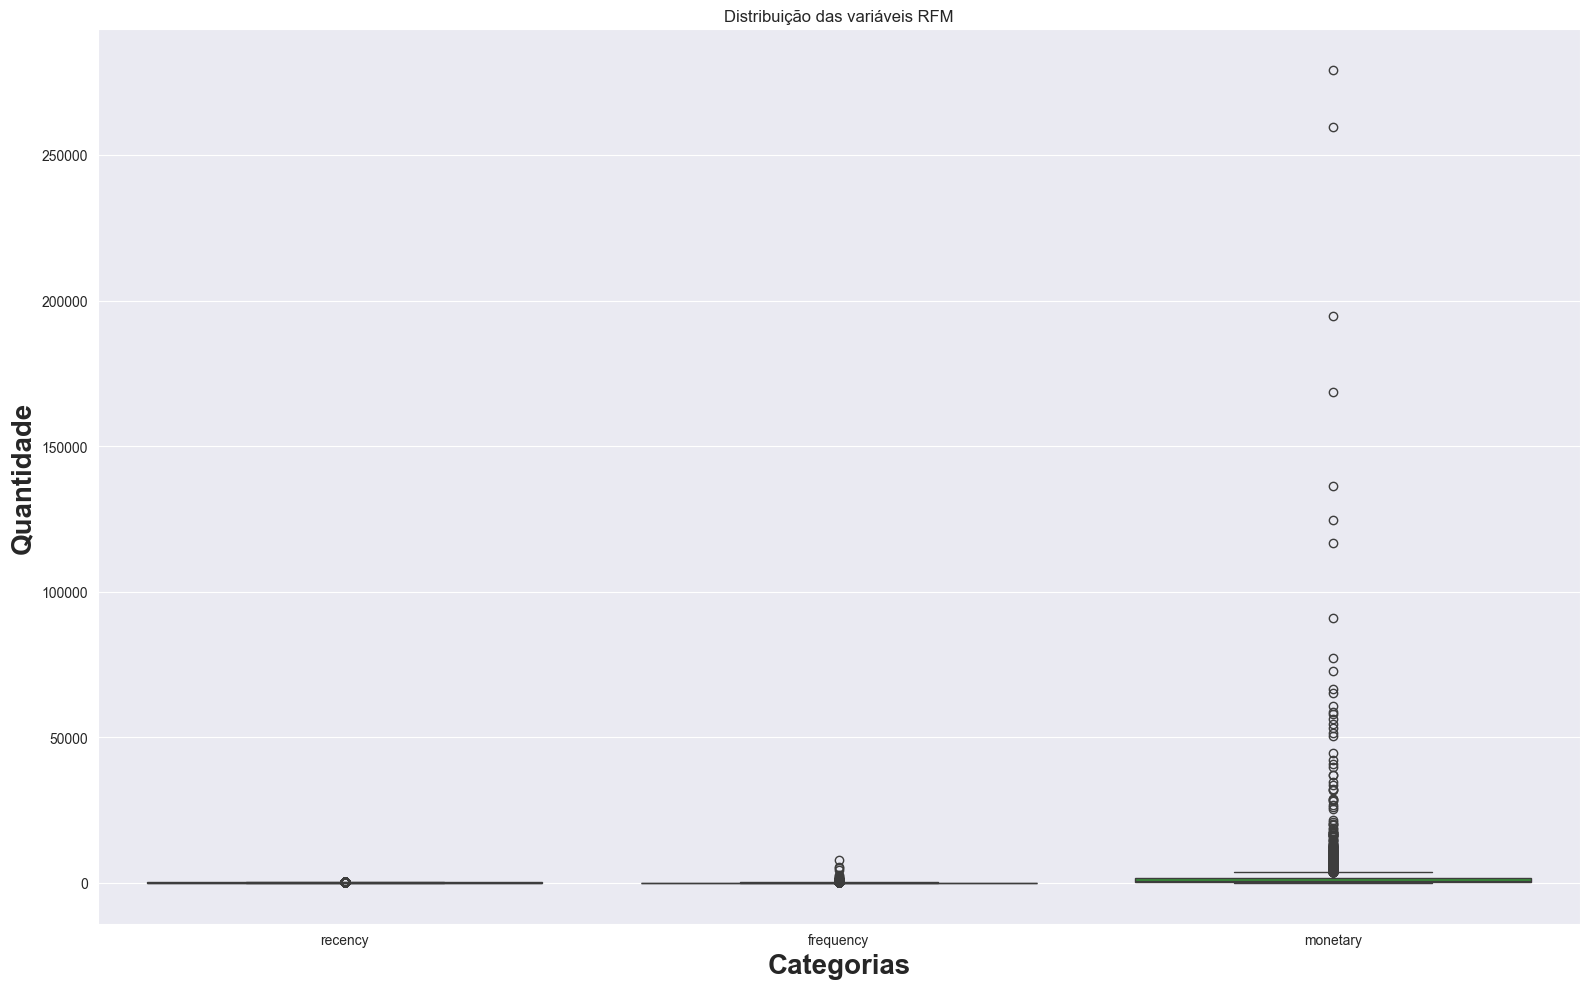

In [27]:
plt.figure(figsize=(16,10))
sns.boxplot(
    data=RFM[['recency','frequency','monetary']]
)
plt.title("Distribuição das variáveis RFM")
plt.ylabel("Quantidade",fontsize=20,fontweight='bold')
plt.xlabel("Categorias",fontsize=20,fontweight='bold')
plt.tight_layout()
plt.show()